In [1]:
# carga de librerias preliminar

import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

# Importar la data

In [2]:
enlace = 'Limpieza.xlsx'
df = pd.read_excel(enlace)
# visualizamos el excel en la variable df
df

,Segmento,edad,salario,compra
0,A,44.0,72000.0,No
1,B,27.0,48000.0,Yes
2,C,30.0,54000.0,No
3,B,38.0,61000.0,No
4,C,40.0,NaN,Yes
5,A,35.0,58000.0,Yes
6,B,NaN,52000.0,No
7,A,48.0,79000.0,Yes
8,C,50.0,83000.0,No
9,A,37.0,67000.0,Yes


In [3]:
# valores perdidos por columna

df.isnull().sum()

Segmento    0
edad        1
salario     1
compra      0
dtype: int64

In [4]:
# para verificar si tenemos valores perdidos

df.isnull().sum().sum()

2

# Método 1
Eliminar las filas que contengan valores perdidos

In [5]:
# la primera forma de lidiar con data perdida
# eliminar las filas que contienen data perdida
# Eliminar filas con valores NaN

df_sin_nan = df.dropna()

# Mostrar el DataFrame resultante
print(df_sin_nan)

  Segmento  edad  salario compra
0        A  44.0  72000.0     No
1        B  27.0  48000.0    Yes
2        C  30.0  54000.0     No
3        B  38.0  61000.0     No
5        A  35.0  58000.0    Yes
7        A  48.0  79000.0    Yes
8        C  50.0  83000.0     No
9        A  37.0  67000.0    Yes


In [6]:
# verificamos que eliminamos los datos NaN

df_sin_nan.isnull().sum().sum()

0

# Método 2
Reemplazar el valor perdido de cada columna por un valor constante

In [9]:
# creo una copia del df original llamada df2
# vamos a recuperar los datos en df2
# por  lo tanto el df original seguirá con los valores perdidos

df2 = df
df2

,Segmento,edad,salario,compra
0,A,44.0,72000.0,No
1,B,27.0,48000.0,Yes
2,C,30.0,54000.0,No
3,B,38.0,61000.0,No
4,C,40.0,NaN,Yes
5,A,35.0,58000.0,Yes
6,B,NaN,52000.0,No
7,A,48.0,79000.0,Yes
8,C,50.0,83000.0,No
9,A,37.0,67000.0,Yes


In [8]:
# los valores 40 y 60000 no use ningun criterio. (conocimiento de tu negocio)
# debes conocer el valor a reemplazar

df2['edad'].fillna(40, inplace=True)
df2['salario'].fillna(60000, inplace=True)

df2

,Segmento,edad,salario,compra
0,A,44.0,72000.0,No
1,B,27.0,48000.0,Yes
2,C,30.0,54000.0,No
3,B,38.0,61000.0,No
4,C,40.0,60000.0,Yes
5,A,35.0,58000.0,Yes
6,B,40.0,52000.0,No
7,A,48.0,79000.0,Yes
8,C,50.0,83000.0,No
9,A,37.0,67000.0,Yes


# Método 3
Utilizando una libreria llamada SimpleImputer utiliza descriptivos estadísticos (media, mediana , moda)

In [10]:
# verificar los nombres de los encabezados

df.columns

Index(['Segmento', 'edad', 'salario', 'compra'], dtype='object')

In [11]:
# importamos la libreria
from sklearn.impute import SimpleImputer

# Crear un objeto SimpleImputer para imputar los valores faltantes con el promedio
# strategy ['mean', 'median','most_frequent_value']

imputer = SimpleImputer(strategy='mean')

In [12]:
# Imputar los valores faltantes en el DataFrame df

df_imputed = pd.DataFrame(imputer.fit_transform(df[['edad','salario']]), columns = ['edad','salario'])

# El DataFrame df_imputed ahora tiene los valores faltantes imputados con el promedio
df_imputed

,edad,salario
0,44.000000,72000.000000
1,27.000000,48000.000000
2,30.000000,54000.000000
3,38.000000,61000.000000
4,40.000000,63777.777778
5,35.000000,58000.000000
6,38.777778,52000.000000
7,48.000000,79000.000000
8,50.000000,83000.000000
9,37.000000,67000.000000


In [13]:
# al df_inputado le agregamos la columna compra

df_imputed['compra'] = df.compra
df_imputed

,edad,salario,compra
0,44.000000,72000.000000,No
1,27.000000,48000.000000,Yes
2,30.000000,54000.000000,No
3,38.000000,61000.000000,No
4,40.000000,63777.777778,Yes
5,35.000000,58000.000000,Yes
6,38.777778,52000.000000,No
7,48.000000,79000.000000,Yes
8,50.000000,83000.000000,No
9,37.000000,67000.000000,Yes


In [14]:
# tener presente el argumento axis = 0 (concatenación es vertical)
## cuando axis = 1, (la concatenación es horizontal)

total = pd.concat([df[['Segmento']], df_imputed], axis = 1)
total

,Segmento,edad,salario,compra
0,A,44.000000,72000.000000,No
1,B,27.000000,48000.000000,Yes
2,C,30.000000,54000.000000,No
3,B,38.000000,61000.000000,No
4,C,40.000000,63777.777778,Yes
5,A,35.000000,58000.000000,Yes
6,B,38.777778,52000.000000,No
7,A,48.000000,79000.000000,Yes
8,C,50.000000,83000.000000,No
9,A,37.000000,67000.000000,Yes


# 4 Imputer Knn

In [15]:
df.isnull().sum().sum()

2

In [16]:
from sklearn.impute import KNNImputer
# Crear un objeto KNNImputer
imputer = KNNImputer(n_neighbors = 2)  # Elige el número de vecinos a considerar

In [17]:
# Imputar los valores faltantes en el DataFrame df
df_imputed = pd.DataFrame(imputer.fit_transform(df[['edad','salario']]), columns = ['edad','salario'])

# El DataFrame df_imputed ahora tiene los valores faltantes imputados por KNN
print(df_imputed)

   edad  salario
0  44.0  72000.0
1  27.0  48000.0
2  30.0  54000.0
3  38.0  61000.0
4  40.0  64000.0
5  35.0  58000.0
6  28.5  52000.0
7  48.0  79000.0
8  50.0  83000.0
9  37.0  67000.0


In [18]:
df_imputed['compra'] = df.compra
df_imputed

,edad,salario,compra
0,44.0,72000.0,No
1,27.0,48000.0,Yes
2,30.0,54000.0,No
3,38.0,61000.0,No
4,40.0,64000.0,Yes
5,35.0,58000.0,Yes
6,28.5,52000.0,No
7,48.0,79000.0,Yes
8,50.0,83000.0,No
9,37.0,67000.0,Yes


In [19]:
total2 = pd.concat([df[['Segmento']], df_imputed], axis = 1)
total2

,Segmento,edad,salario,compra
0,A,44.0,72000.0,No
1,B,27.0,48000.0,Yes
2,C,30.0,54000.0,No
3,B,38.0,61000.0,No
4,C,40.0,64000.0,Yes
5,A,35.0,58000.0,Yes
6,B,28.5,52000.0,No
7,A,48.0,79000.0,Yes
8,C,50.0,83000.0,No
9,A,37.0,67000.0,Yes


# plot

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

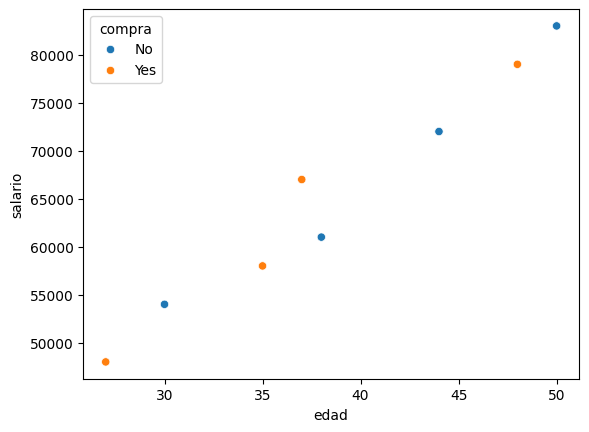

In [26]:
sns.scatterplot(data = df, x ='edad',y = 'salario', hue ='compra')
plt.show()